In [1]:
import snscrape
import snscrape.modules.twitter as sn
import snscrape.modules.instagram as sni

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def politico(nome) : 
    #Definizione ricerca
    dizionario = ['"Cambiamento climatico"' , '"Emissioni"' , '"Riscaldamento globale"' ,
    '"Emergenza climatica"' ,'"Accordi di Parigi"', '"AccordidiParigi"' , '"Gas serra"' , '"rinnovabili"' , '"Sciopero climatico"' ]
    claim = nome  + dizionario[0]
    for i in dizionario :
        claim = claim  + ' OR ' + i 
    claim = claim  + ' until:2018-3-4 since:2017-3-4'
    print(claim)

    #ricerca e conto
    scrape = sn.TwitterSearchScraper(claim)
    counter = 0
    for i in scrape.get_items() :
        counter = counter +1
        
    #conto totale    
    claim = nome + ' until:2018-3-4 since:2017-3-4'
    scrape = sn.TwitterSearchScraper(claim)
    counter_tot = 0
    for i in scrape.get_items() :
        counter_tot = counter_tot +1

    if(counter_tot  == 0) : print('Errore')

    return counter/counter_tot , counter_tot , counter

In [3]:
def somma(a , b) : 
    c = []
    for i in range(len(a)) : 
        c.append( a[i] + b[i])

    c[0] = c[2]/c[1]
    return c

In [9]:
print('lippo')
Salvini = politico('(from:matteosalvinimi)')
print('lippo')
Meloni = politico('(from:GiorgiaMeloni)')
print('lippo')
Renzi = politico('(from:matteorenzi)')
print('lippo')
DiMaio = politico('(from:luigidimaio)')
print('lippo')
Silvio = politico('(from:berlusconi)')

lippo
(from:matteosalvinimi)"Cambiamento climatico" OR "Cambiamento climatico" OR "Emissioni" OR "Riscaldamento globale" OR "Emergenza climatica" OR "Accordi di Parigi" OR "AccordidiParigi" OR "Gas serra" OR "rinnovabili" OR "Sciopero climatico" until:2018-3-4 since:2017-3-4
lippo
(from:GiorgiaMeloni)"Cambiamento climatico" OR "Cambiamento climatico" OR "Emissioni" OR "Riscaldamento globale" OR "Emergenza climatica" OR "Accordi di Parigi" OR "AccordidiParigi" OR "Gas serra" OR "rinnovabili" OR "Sciopero climatico" until:2018-3-4 since:2017-3-4
lippo
(from:matteorenzi)"Cambiamento climatico" OR "Cambiamento climatico" OR "Emissioni" OR "Riscaldamento globale" OR "Emergenza climatica" OR "Accordi di Parigi" OR "AccordidiParigi" OR "Gas serra" OR "rinnovabili" OR "Sciopero climatico" until:2018-3-4 since:2017-3-4
lippo
(from:luigidimaio)"Cambiamento climatico" OR "Cambiamento climatico" OR "Emissioni" OR "Riscaldamento globale" OR "Emergenza climatica" OR "Accordi di Parigi" OR "Accordidi

In [5]:
print('lippo')
Lega = politico('(from:LegaSalvini)')
print('lippo')
Pd = politico('(from:pdnetwork)')
print('lippo')
FDI = politico('(from:FratellidItalia)')
print('lippo')
M5S = politico('(from:Mov5Stelle)')
print('lippo')
FI = politico('from:forza_italia')

lippo
(from:LegaSalvini)"Cambiamento climatico" OR "Cambiamento climatico" OR "Emissioni" OR "Riscaldamento globale" OR "Emergenza climatica" OR "Accordi di Parigi" OR "AccordidiParigi" OR "Gas serra" OR "rinnovabili" OR "Sciopero climatico" until:2018-3-4 since:2017-3-4
lippo
(from:pdnetwork)"Cambiamento climatico" OR "Cambiamento climatico" OR "Emissioni" OR "Riscaldamento globale" OR "Emergenza climatica" OR "Accordi di Parigi" OR "AccordidiParigi" OR "Gas serra" OR "rinnovabili" OR "Sciopero climatico" until:2018-3-4 since:2017-3-4
lippo
(from:FratellidItalia)"Cambiamento climatico" OR "Cambiamento climatico" OR "Emissioni" OR "Riscaldamento globale" OR "Emergenza climatica" OR "Accordi di Parigi" OR "AccordidiParigi" OR "Gas serra" OR "rinnovabili" OR "Sciopero climatico" until:2018-3-4 since:2017-3-4
lippo
(from:Mov5Stelle)"Cambiamento climatico" OR "Cambiamento climatico" OR "Emissioni" OR "Riscaldamento globale" OR "Emergenza climatica" OR "Accordi di Parigi" OR "AccordidiParig

In [10]:
risultati = [4.3  , 32.68 , 18.81 , 17.36 , 14.04  ]
partiti = ['FDI' , 'M5S' , 'PD' , 'Lega' , 'FI'  ]
tweet = [somma(Meloni,FDI) , somma(DiMaio , M5S) , somma(Renzi,Pd) , somma(Salvini,Lega) , somma(Silvio,FI)]
tweet_p  = [somma(Meloni,FDI)[0] , somma(DiMaio , M5S)[0] , somma(Renzi,Pd)[0] , somma(Salvini,Lega)[0] , somma(Silvio,FI)[0]]
colori = ['blue' , 'yellow' , 'red' ,'green' , 'lightblue' ]

dati = {'Partiti' : partiti , 'Tweet' : tweet , 'Risultati' : risultati , 'Colori' : colori , 'Tweet_p' : tweet_p}
Dati = pd.DataFrame(dati)
Dati.Tweet_p = (Dati.Tweet_p * 50)
Dati.sort_values(by = 'Tweet_p' , inplace = True , ignore_index = True)
for i in range(len(Dati.Tweet_p)) :
    Dati.Tweet_p[i] = '{:1.3f}'.format(Dati.Tweet_p[i])
Dati

/tmp/ipykernel_85456/2718679319.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dati.Tweet_p[i] = '{:1.3f}'.format(Dati.Tweet_p[i])


,Partiti,Tweet,Risultati,Colori,Tweet_p
0,FDI,"[0.0, 2853, 0]",4.30,blue,0.000
1,FI,"[0.0, 2259, 0]",14.04,lightblue,0.000
2,Lega,"[0.00019705210057539214, 25374, 5]",17.36,green,0.010
3,PD,"[0.0007742934572202865, 2583, 2]",18.81,red,0.039
4,M5S,"[0.003207184092366902, 1559, 5]",32.68,yellow,0.160


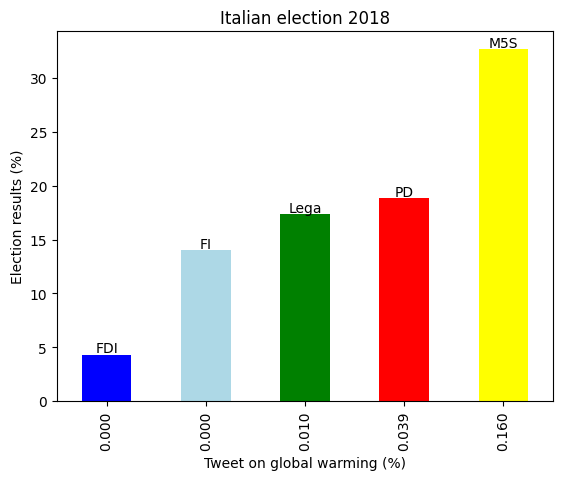

In [11]:
ax = Dati.plot.bar(x = 'Tweet_p' , y = 'Risultati'  , color= Dati['Colori'].array , legend = False , 
xlabel = 'Tweet on global warming (%)' , ylabel = 'Election results (%)' , title = "Italian election 2018")

counter = 0
for patch in ax.patches :
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0] 
    y = patch.get_height() + bl[1] +0.2
    ax.text(x,y,(Dati.Partiti[counter]),
            ha='center', rotation='horizontal')
    counter = counter +1

In [12]:
Dati.to_csv('Elezioni2018.csv' , index=False)